In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid")
sns.set_palette(palette="Paired")

# Load Data
In this section we load the data from the data dir and concat corresponding data frames for the analysis.

In [33]:
# Read provided data
x_train = pd.read_csv("../data/raw/train_values.csv")
y_train = pd.read_csv("../data/raw/train_labels.csv")
x_test = pd.read_csv("../data/raw/test_values.csv")

# Concat x_train and y_train for analysis: Drop building_id since its redundant then
df_train = pd.concat([x_train, y_train.drop(["building_id"], axis=1)], axis=1)

# Print information about shape
print(f"Shape of train_values.csv: {x_train.shape}")
print(f"Shape of train_labels.csv: {y_train.shape}")
print(f"Shape of concat df_train to analyse: {df_train.shape}")

# Preview df
df_train.head(5)

Shape of train_values.csv: (260601, 39)
Shape of train_labels.csv: (260601, 2)
Shape of concat df_train to analyse: (260601, 40)


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


# Analyse relationship between numerical features to target variable

In [96]:
# Compute pearson correlation for all numerical features
corr = df_train._get_numeric_data().corr()

# Get only correlation from features to target
corr_features_to_target = corr.loc[:, "damage_grade"]
# Convert to pandas DataFrame and drop row 'damage_grade', since corr with itself is always 1
corr_features_to_target = pd.DataFrame(corr_features_to_target)
corr_features_to_target = corr_features_to_target.round(decimals=4)
corr_features_to_target.drop(["damage_grade", "building_id"], inplace=True)

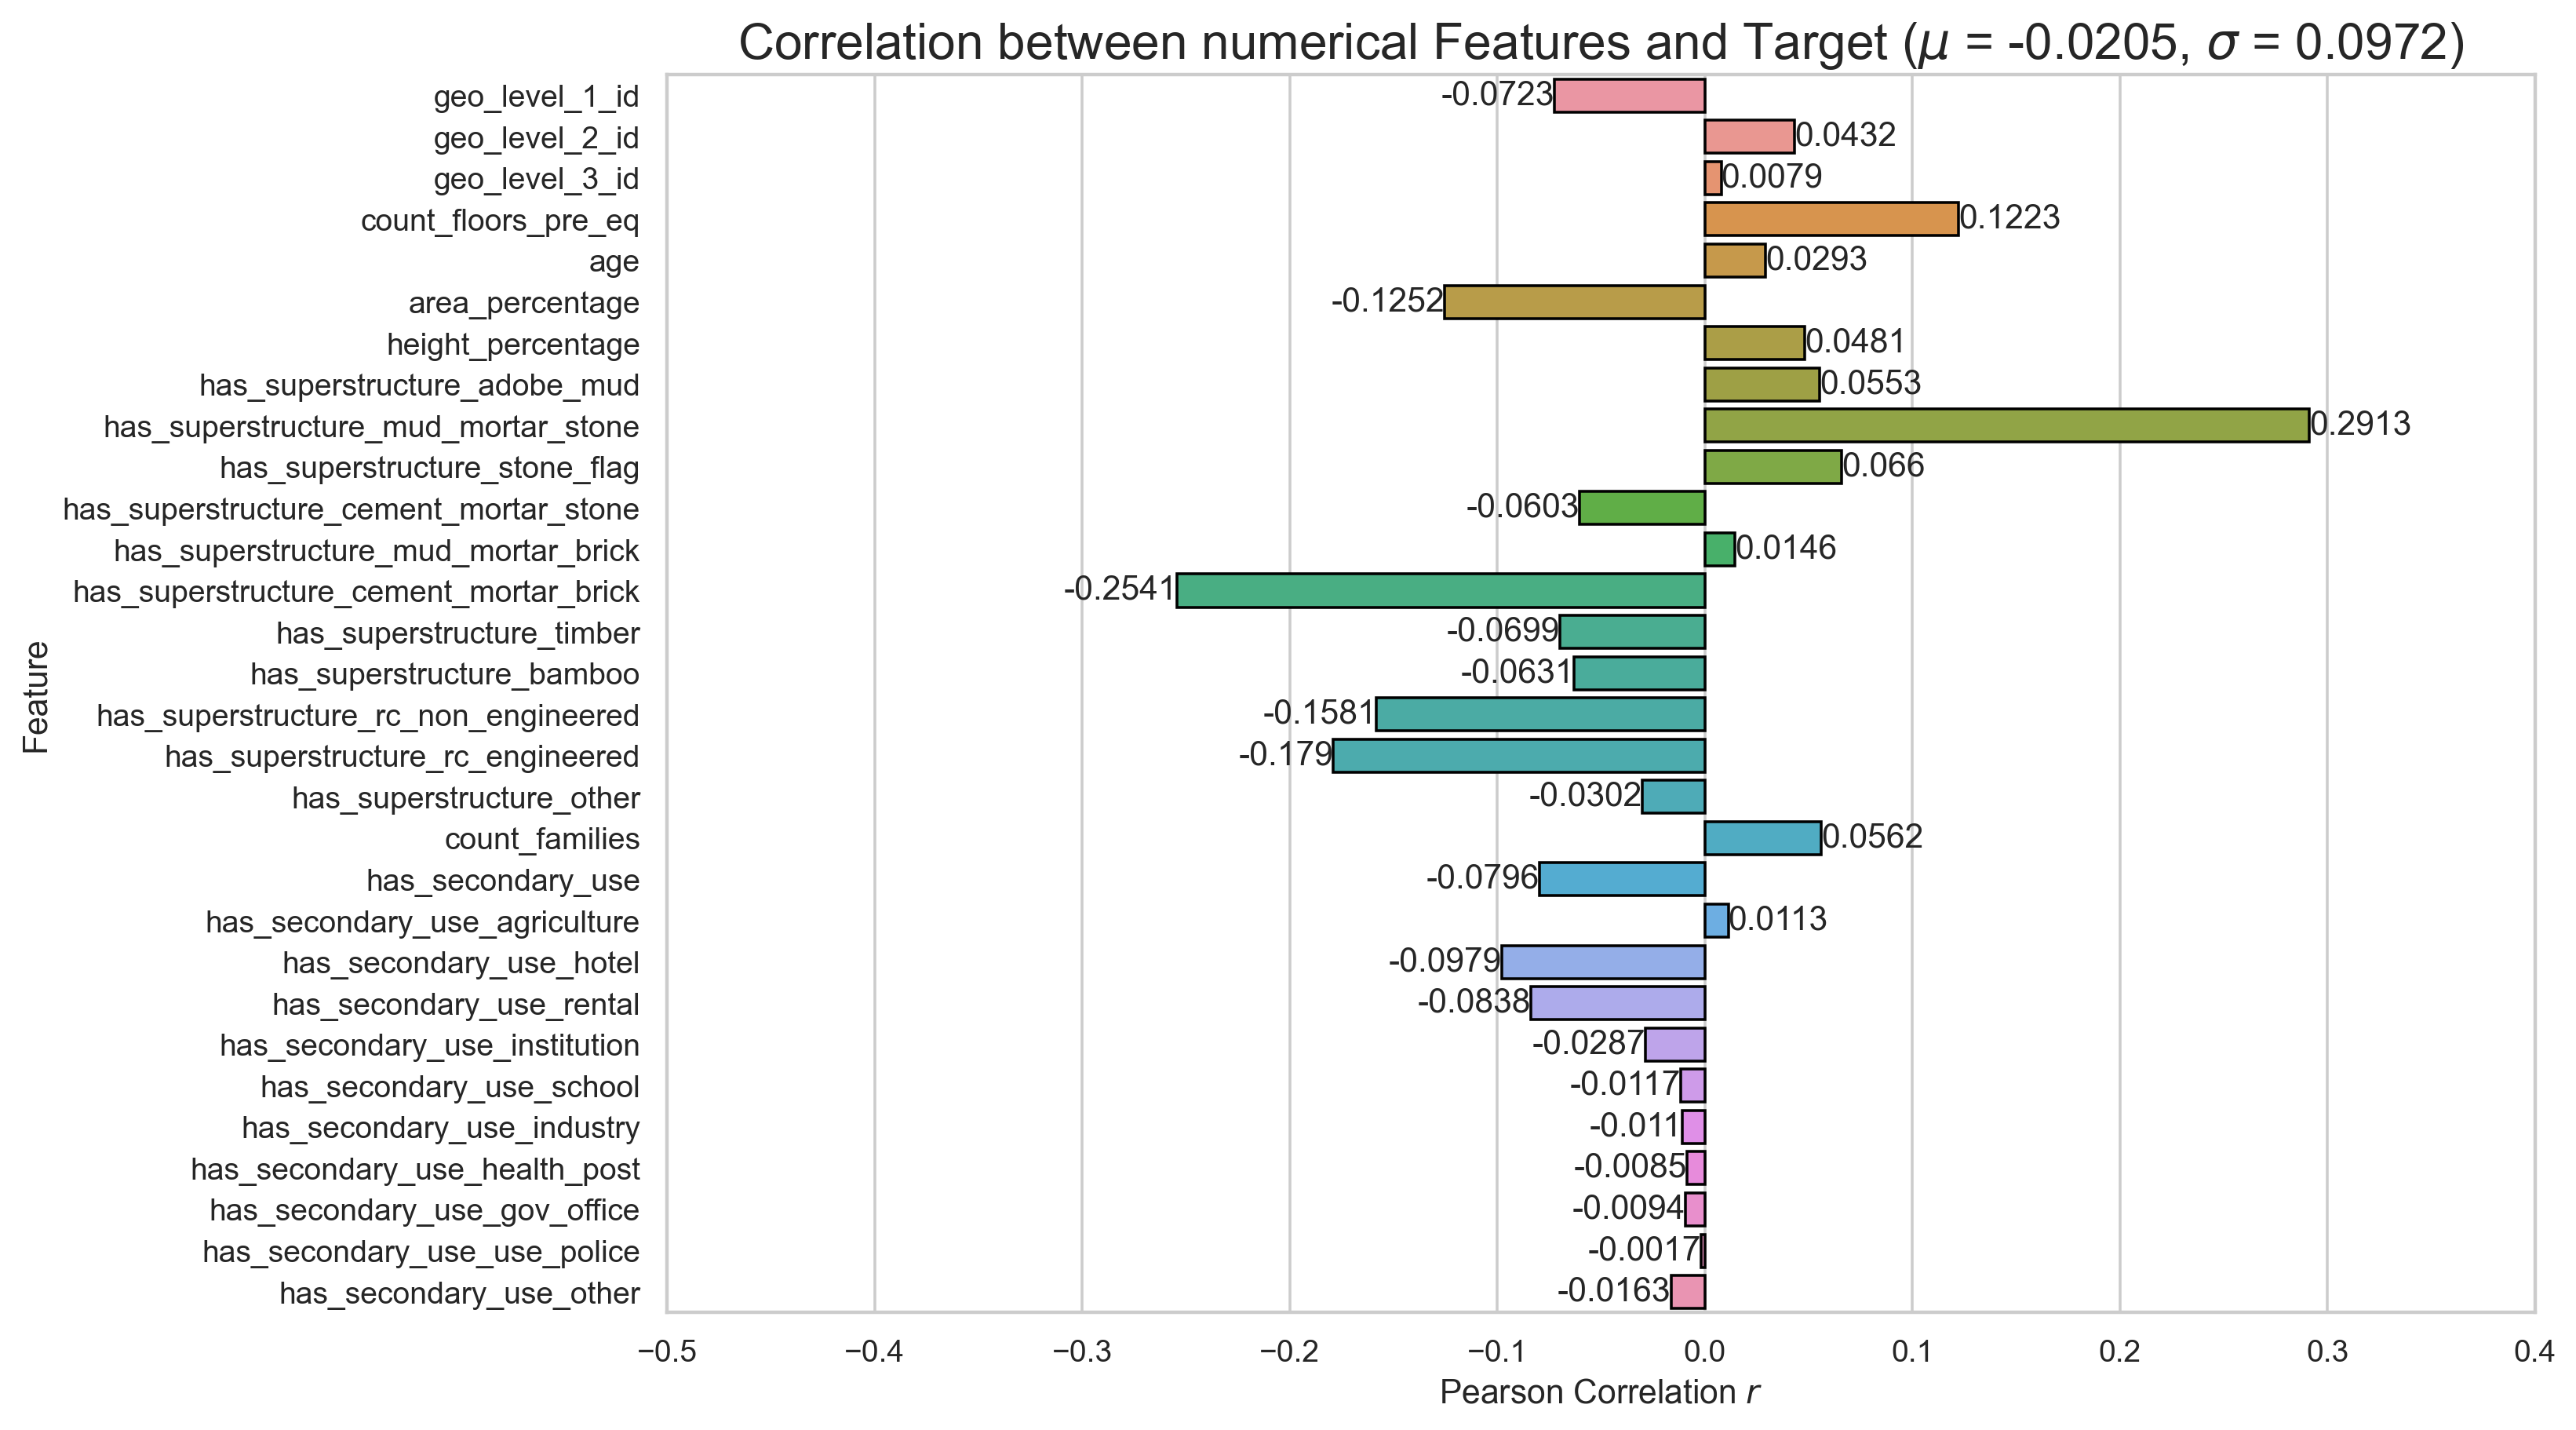

In [108]:
# Plot settings
plt.figure(figsize=(12,8), dpi=256)
# Compute mean and standard deviation of correlations
avg_corr = round(np.mean(corr_features_to_target.values), 4)
std_corr = round(np.std(corr_features_to_target.values), 4)
plt.title(f"Correlation between numerical Features and Target ($\mu$ = {avg_corr}, $\sigma$ = {std_corr})", size=18)
g = sns.barplot(data=corr_features_to_target, x="damage_grade", y=corr_features_to_target.index, edgecolor="black")
g.bar_label(g.containers[0])
plt.xticks(np.arange(-0.5, 0.5, 0.1))
plt.xlabel("Pearson Correlation $r$")
plt.ylabel("Feature")
plt.show()

## Findings
* Positive Correlation:
    * Highest positive correlation of $0.2913$ between **has_superstructure_mud_mortar_stone** and target variable **damage_grade**: If the superstructure was made of Mud Mortar - Brick it is more likely that the damage grade is high, i.e. the damages are higher.
    * Also high positive correlation of $0.1223$ between **count_floors_pre_eq** and target variable: Probably if the number of floors in the building increases, the more likely the chance of higher damages.

* Negative Correlation:
    * Highest negative correlation of $-0.2541$ between **has_superstructure_cement_mortar_brick** and target variable **damage_grade**.
    * Also high negative correlation between **has_superstructure_rc_engineered** to target variable ($-0.179$) and between **has_superstructure_rc_non_engineered** to target variable ($-0.1581$): If the superstructure was made of reinforced engineered / non-engineered concrete, it is less likely to have higher damages.
    * Also high negative correlation between **area_percentage** and the target variable ($-0.1252$): If the normalized area of the building footprint increases, the damage grade decreases, i.e. it is less likely to have high damages.
    * Also buildings with secondary use as a hotel ($-0.0979$) **has_secondary_use_hotel** is also less likely to have higher damages from earthquakes.

In [109]:
#corr_features_to_target.sort_values(by="damage_grade").T